In [101]:
%matplotlib inline
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/')
from BB_MesoWest.get_MesoWest import get_mesowest_ts

from matplotlib.dates import DateFormatter
formatter = DateFormatter('%b-%d\n%H:%M')

import matplotlib.dates as mdates
#xaxis.set_major_locator(mdates.HourLocator(range(0, 24, 3)))
#ax1.xaxis.set_minor_locator(mdates.HourLocator(range(0, 24, 1)))

In [108]:
mpl.rcParams['figure.figsize'] = [12,5]
mpl.rcParams['figure.titlesize'] = 12
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 12 #8
mpl.rcParams['ytick.labelsize'] = 12 #8
mpl.rcParams['axes.labelsize'] = 12 #8
mpl.rcParams['axes.titlesize'] = 12 #10
mpl.rcParams['lines.linewidth'] = 1.8
mpl.rcParams['grid.linewidth'] = .25
mpl.rcParams['figure.subplot.wspace'] = 0.05
mpl.rcParams['figure.subplot.hspace'] = 0.05
mpl.rcParams['legend.fontsize'] = 12 #7
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 300

In [121]:
sDATE = datetime(2018, 8, 4)
eDATE = datetime(2018, 8, 15)

DATA = {}

for STID in ['QHW', 'QH3', 'QLN', 'QSF']:
    a = get_mesowest_ts(STID, sDATE, eDATE, variables='PM_25_concentration')
    DATES = [a['DATETIME'][i] for i in range(len(a['PM_25_concentration'])) if np.isnan(a['PM_25_concentration'][i]) == False]
    PM25 = [a['PM_25_concentration'][i] for i in range(len(a['PM_25_concentration'])) if np.isnan(a['PM_25_concentration'][i]) == False]
    DATA[STID] = [DATES, PM25]


Retrieving from MesoWest API: http://api.mesowest.net/v2/stations/timeseries?&token=2562b729557f45f5958516081f06c9eb&stid=QHW&start=201808040000&end=201808150000&vars=PM_25_concentration&obtimezone=UTC&output=json

    Used PM_25_concentration_set_1

Retrieving from MesoWest API: http://api.mesowest.net/v2/stations/timeseries?&token=2562b729557f45f5958516081f06c9eb&stid=QH3&start=201808040000&end=201808150000&vars=PM_25_concentration&obtimezone=UTC&output=json

    Used PM_25_concentration_set_1

Retrieving from MesoWest API: http://api.mesowest.net/v2/stations/timeseries?&token=2562b729557f45f5958516081f06c9eb&stid=QLN&start=201808040000&end=201808150000&vars=PM_25_concentration&obtimezone=UTC&output=json

    Used PM_25_concentration_set_1

Retrieving from MesoWest API: http://api.mesowest.net/v2/stations/timeseries?&token=2562b729557f45f5958516081f06c9eb&stid=QSF&start=201808040000&end=201808150000&vars=PM_25_concentration&obtimezone=UTC&output=json

    Used PM_25_concentration_se

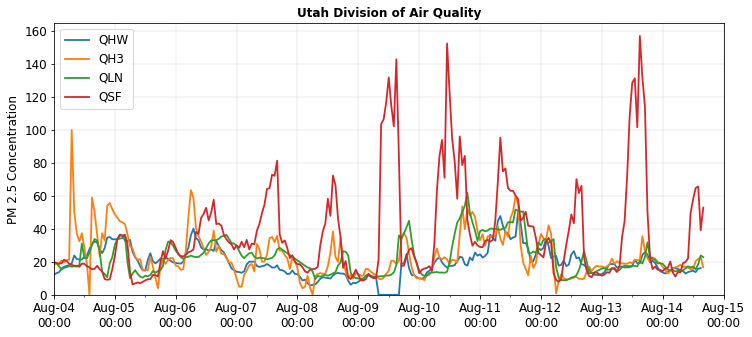

In [124]:
for i in DATA:
    D = DATA[i]
    plt.plot(D[0], D[1], label=i)

plt.legend()

plt.title('Utah Division of Air Quality', fontweight='semibold')
plt.ylabel('PM 2.5 Concentration')
plt.grid()
plt.xlim([sDATE, eDATE])
plt.ylim(ymin=0)

plt.gcf().axes[0].xaxis.set_major_formatter(formatter)
plt.gcf().axes[0].xaxis.set_major_locator(mdates.HourLocator(range(0, 24, 24)))
plt.gcf().axes[0].xaxis.set_minor_locator(mdates.HourLocator(range(0, 24, 12)))

plt.savefig('CoalHollowFire_PM25')